The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71 

Ambient pressure (AP) mbar 985.85 1036.56 1013.07 

Ambient humidity (AH) (%) 24.08 100.20 77.87 

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93 

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56 

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43 

Turbine after temperature (TAT) C 511.04 550.61 546.16 

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06 

Turbine energy yield (TEY) MWH 100.02 179.50 133.51 

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37 

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

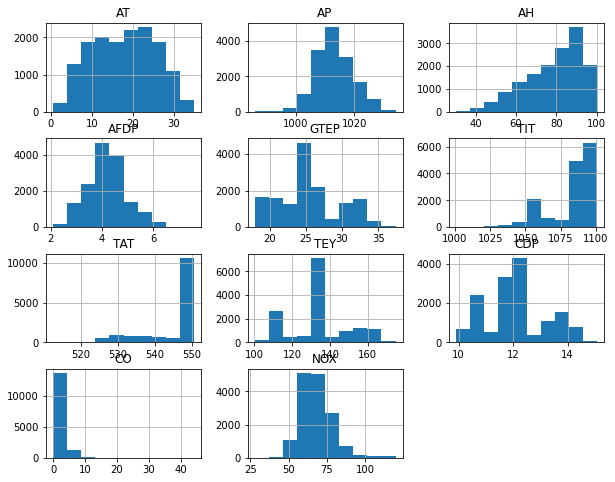

In [6]:
df.hist(figsize=(10,8))
plt.tight_layout

In [7]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [8]:
df2 = df.drop('TEY',axis = 1)
df2['TEY'] = df['TEY'] 

<AxesSubplot:>

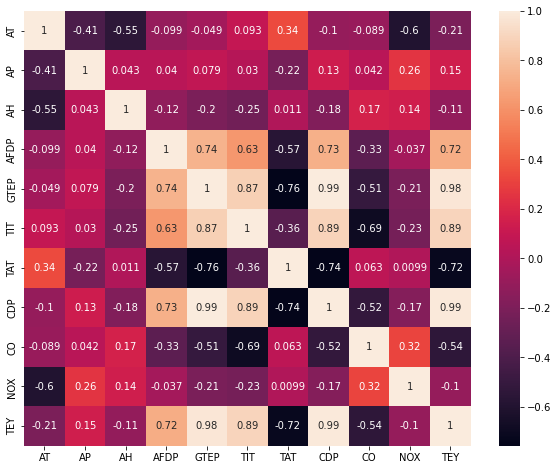

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True)

In [10]:
X = df.drop('TEY',axis = 1)
y = df['TEY']


In [11]:
norm = Normalizer()

In [12]:
vals = norm.fit_transform(X)
vals

array([[0.00437602, 0.64299944, 0.06175385, ..., 0.00676556, 0.00201257,
        0.05277329],
       [0.00432742, 0.64314925, 0.06194106, ..., 0.00675932, 0.00206409,
        0.05279385],
       [0.00439876, 0.64332579, 0.06118163, ..., 0.00676041, 0.00204145,
        0.05259099],
       ...,
       [0.00469232, 0.64997594, 0.06426514, ..., 0.00677104, 0.00514348,
        0.05872067],
       [0.00450928, 0.64800828, 0.06372468, ..., 0.00677937, 0.00402231,
        0.06000384],
       [0.00444121, 0.64567659, 0.0625246 , ..., 0.00678435, 0.00319351,
        0.05929686]])

In [13]:
X = pd.DataFrame(vals,columns=X.columns)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.004376,0.642999,0.061754,0.002233,0.012544,0.675727,0.350878,0.006766,0.002013,0.052773
1,0.004327,0.643149,0.061941,0.002232,0.012582,0.675613,0.350785,0.006759,0.002064,0.052794
2,0.004399,0.643326,0.061182,0.002221,0.012613,0.675594,0.350660,0.006760,0.002041,0.052591
3,0.004499,0.643415,0.060726,0.002219,0.012618,0.675548,0.350646,0.006762,0.002035,0.052706
4,0.004715,0.643585,0.060649,0.002229,0.012598,0.675455,0.350559,0.006764,0.002071,0.052465
...,...,...,...,...,...,...,...,...,...,...
15034,0.005795,0.645350,0.063187,0.002273,0.012299,0.673652,0.350534,0.006674,0.002900,0.051057
15035,0.005072,0.646823,0.063720,0.002254,0.012484,0.672802,0.349306,0.006709,0.003117,0.051389
15036,0.004692,0.649976,0.064265,0.002246,0.012615,0.670257,0.347059,0.006771,0.005143,0.058721
15037,0.004509,0.648008,0.063725,0.002220,0.012472,0.671436,0.348359,0.006779,0.004022,0.060004


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
model = Sequential()
model.add(Dense(12,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(1,kernel_initializer = 'uniform',activation = 'linear'))

2022-04-16 12:32:27.242110: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [17]:
model.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
504/504 [==============================] - 1s 2ms/step - loss: 114.1565
Epoch 2/100
504/504 [==============================] - 1s 2ms/step - loss: 14.3457
Epoch 3/100
504/504 [==============================] - 2s 4ms/step - loss: 11.1836
Epoch 4/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1338
Epoch 5/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1044
Epoch 6/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0634
Epoch 7/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0280
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 10.9919
Epoch 9/100
504/504 [==============================] - 1s 2ms/step - loss: 10.9436
Epoch 10/100
504/504 [==============================] - 1s 2ms/step - loss: 10.9109
Epoch 11/100
504/504 [==============================] - 1s 2ms/step - loss: 10.8712
Epoch 12/100
504/504 [==============================] - 1s 1ms/step - loss: 10.8393


504/504 [==============================] - 1s 2ms/step - loss: 2.1235
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 2.1120


## HyperParameter Tuning

In [18]:
neuron_1 = [4,8,12,16]
neuron_2 = [5,7,10,15]
kernels = ['uniform','normal','zero']
actf = ['relu','linear','tanh']
optimizers = ['SGD','Adam','Adadelta','Adagrad']
batch_size = [10,50,100]
epochs = [60,30,100]
dropout = [0.1,0.2,0.3,0.01]

### Neurons 

In [19]:
params1 = dict(neuron_1 = neuron_1, neuron_2 = neuron_2,epochs = [10])

In [20]:
def create_model(neuron_1,neuron_2):
    model = Sequential()
    model.add(Dense(neuron_1,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron_2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'linear'))
    
    model.compile(optimizer='adam',loss='mean_absolute_error')
    
    return model

In [21]:
model = KerasRegressor(build_fn=create_model)

In [22]:
grid = GridSearchCV(estimator=model,param_grid=params1,cv=2,verbose=20)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START epochs=10, neuron_1=4, neuron_2=5..........................
Epoch 1/10
158/158 [==============================] - 0s 1ms/step - loss: 134.0233
Epoch 2/10
158/158 [==============================] - 0s 1ms/step - loss: 133.1387
Epoch 3/10
158/158 [==============================] - 0s 1ms/step - loss: 130.4789
Epoch 4/10
158/158 [==============================] - 0s 1ms/step - loss: 125.0133
Epoch 5/10
158/158 [==============================] - 0s 1ms/step - loss: 115.8759
Epoch 6/10
158/158 [==============================] - 0s 2ms/step - loss: 102.3442
Epoch 7/10
158/158 [==============================] - 0s 3ms/step - loss: 83.8137
Epoch 8/10
158/158 [==============================] - 0s 1ms/step - loss: 59.7759
Epoch 9/10
158/158 [==============================] - 1s 3ms/step - loss: 30.7903
Epoch 10/10
158/158 [==============================] - 0s 1ms/step - loss: 11.2416
[CV 1/2; 1/16] END epochs=10, n

158/158 [==============================] - 0s 1ms/step - loss: 19.3988
Epoch 8/10
158/158 [==============================] - 0s 1ms/step - loss: 11.2374
Epoch 9/10
158/158 [==============================] - 0s 1ms/step - loss: 11.2253
Epoch 10/10
158/158 [==============================] - 0s 1ms/step - loss: 11.1321
[CV 2/2; 4/16] END epochs=10, neuron_1=4, neuron_2=15;, score=-11.132 total time=   3.0s
[CV 1/2; 5/16] START epochs=10, neuron_1=8, neuron_2=5..........................
Epoch 1/10
158/158 [==============================] - 1s 1ms/step - loss: 133.9677
Epoch 2/10
158/158 [==============================] - 0s 1ms/step - loss: 132.0744
Epoch 3/10
158/158 [==============================] - 0s 2ms/step - loss: 125.3042
Epoch 4/10
158/158 [==============================] - 0s 2ms/step - loss: 110.4981
Epoch 5/10
158/158 [==============================] - 0s 1ms/step - loss: 85.0200
Epoch 6/10
158/158 [==============================] - 0s 2ms/step - loss: 46.7177
Epoch 7/10
158/1

Epoch 3/10
158/158 [==============================] - 0s 2ms/step - loss: 119.7878
Epoch 4/10
158/158 [==============================] - 0s 2ms/step - loss: 94.8954
Epoch 5/10
158/158 [==============================] - 0s 2ms/step - loss: 52.0718
Epoch 6/10
158/158 [==============================] - 0s 2ms/step - loss: 14.0995
Epoch 7/10
158/158 [==============================] - 0s 3ms/step - loss: 11.2360
Epoch 8/10
158/158 [==============================] - 1s 3ms/step - loss: 11.2291
Epoch 9/10
158/158 [==============================] - 0s 2ms/step - loss: 11.2251
Epoch 10/10
158/158 [==============================] - 0s 1ms/step - loss: 11.1253
[CV 2/2; 8/16] END epochs=10, neuron_1=8, neuron_2=15;, score=-11.125 total time=   6.1s
[CV 1/2; 9/16] START epochs=10, neuron_1=12, neuron_2=5.........................
Epoch 1/10
158/158 [==============================] - 1s 4ms/step - loss: 133.9249
Epoch 2/10
158/158 [==============================] - 1s 5ms/step - loss: 131.0590
Epoch 

158/158 [==============================] - 0s 2ms/step - loss: 11.2145
[CV 1/2; 12/16] END epochs=10, neuron_1=12, neuron_2=15;, score=-11.214 total time=   4.0s
[CV 2/2; 12/16] START epochs=10, neuron_1=12, neuron_2=15.......................
Epoch 1/10
158/158 [==============================] - 1s 2ms/step - loss: 133.8529
Epoch 2/10
158/158 [==============================] - 0s 2ms/step - loss: 126.8641
Epoch 3/10
158/158 [==============================] - 0s 2ms/step - loss: 99.8941
Epoch 4/10
158/158 [==============================] - 0s 2ms/step - loss: 42.0268
Epoch 5/10
158/158 [==============================] - 0s 2ms/step - loss: 11.3246
Epoch 6/10
158/158 [==============================] - 0s 2ms/step - loss: 11.2382
Epoch 7/10
158/158 [==============================] - 0s 2ms/step - loss: 11.2275
Epoch 8/10
158/158 [==============================] - 0s 2ms/step - loss: 11.2169
Epoch 9/10
158/158 [==============================] - 0s 2ms/step - loss: 11.2028
Epoch 10/10
158/1

158/158 [==============================] - 0s 2ms/step - loss: 11.1604
Epoch 7/10
158/158 [==============================] - 0s 2ms/step - loss: 11.1525
Epoch 8/10
158/158 [==============================] - 0s 2ms/step - loss: 11.1429
Epoch 9/10
158/158 [==============================] - 0s 2ms/step - loss: 11.1304
Epoch 10/10
158/158 [==============================] - 0s 1ms/step - loss: 11.1961
[CV 1/2; 16/16] END epochs=10, neuron_1=16, neuron_2=15;, score=-11.196 total time=   3.6s
[CV 2/2; 16/16] START epochs=10, neuron_1=16, neuron_2=15.......................
Epoch 1/10
158/158 [==============================] - 1s 2ms/step - loss: 133.8879
Epoch 2/10
158/158 [==============================] - 0s 2ms/step - loss: 125.5483
Epoch 3/10
158/158 [==============================] - 0s 2ms/step - loss: 89.6399
Epoch 4/10
158/158 [==============================] - 0s 2ms/step - loss: 23.9437
Epoch 5/10
158/158 [==============================] - 0s 2ms/step - loss: 11.2401
Epoch 6/10
158/1

GridSearchCV(cv=2,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc17fc6bc40>,
             param_grid={'epochs': [10], 'neuron_1': [4, 8, 12, 16],
                         'neuron_2': [5, 7, 10, 15]},
             verbose=20)

In [23]:
grid.best_params_,grid.best_score_

({'epochs': 10, 'neuron_1': 16, 'neuron_2': 15}, -11.140028953552246)

### Epochs and Batch Size

In [24]:
params2 = dict(batch_size = batch_size, epochs = epochs)

In [25]:
def create_model():
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(15,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'linear'))
    
    model.compile(optimizer='adam',loss='mean_absolute_error')
    
    return model

model = KerasRegressor(build_fn=create_model)


In [26]:
params2

{'batch_size': [10, 50, 100], 'epochs': [60, 30, 100]}

In [27]:
grid = GridSearchCV(estimator=model,param_grid=params2,cv=2,verbose=20)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START batch_size=10, epochs=60....................................
Epoch 1/60
504/504 [==============================] - 1s 1ms/step - loss: 114.0591
Epoch 2/60
504/504 [==============================] - 1s 2ms/step - loss: 14.3032
Epoch 3/60
504/504 [==============================] - 1s 2ms/step - loss: 11.1511
Epoch 4/60
504/504 [==============================] - 1s 2ms/step - loss: 11.1123
Epoch 5/60
504/504 [==============================] - 1s 2ms/step - loss: 11.0896
Epoch 6/60
504/504 [==============================] - 1s 2ms/step - loss: 11.0584
Epoch 7/60
504/504 [==============================] - 1s 2ms/step - loss: 11.0174
Epoch 8/60
504/504 [==============================] - 1s 2ms/step - loss: 10.9977
Epoch 9/60
504/504 [==============================] - 1s 2ms/step - loss: 10.9662
Epoch 10/60
504/504 [==============================] - 1s 2ms/step - loss: 10.9505
Epoch 11/60
504/504 [================

504/504 [==============================] - 1s 2ms/step - loss: 10.1811
Epoch 36/60
504/504 [==============================] - 1s 2ms/step - loss: 10.1364
Epoch 37/60
504/504 [==============================] - 1s 2ms/step - loss: 10.1018
Epoch 38/60
504/504 [==============================] - 1s 2ms/step - loss: 10.0520
Epoch 39/60
504/504 [==============================] - 1s 2ms/step - loss: 10.0164
Epoch 40/60
504/504 [==============================] - 1s 2ms/step - loss: 9.9680
Epoch 41/60
504/504 [==============================] - 1s 2ms/step - loss: 9.9301
Epoch 42/60
504/504 [==============================] - 1s 2ms/step - loss: 9.8789
Epoch 43/60
504/504 [==============================] - 1s 2ms/step - loss: 9.8403
Epoch 44/60
504/504 [==============================] - 1s 2ms/step - loss: 9.7847
Epoch 45/60
504/504 [==============================] - 1s 2ms/step - loss: 9.7398
Epoch 46/60
504/504 [==============================] - 1s 2ms/step - loss: 9.7022
Epoch 47/60
504/504 [==

504/504 [==============================] - 1s 2ms/step - loss: 11.1058
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0676
Epoch 7/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0505
Epoch 8/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0148
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 10.9973
Epoch 10/100
504/504 [==============================] - 1s 2ms/step - loss: 10.9708
Epoch 11/100
504/504 [==============================] - 1s 2ms/step - loss: 10.9487
Epoch 12/100
504/504 [==============================] - 1s 2ms/step - loss: 10.9189
Epoch 13/100
504/504 [==============================] - 1s 2ms/step - loss: 10.8962
Epoch 14/100
504/504 [==============================] - 1s 2ms/step - loss: 10.8736
Epoch 15/100
504/504 [==============================] - 2s 3ms/step - loss: 10.8482
Epoch 16/100
504/504 [==============================] - 1s 2ms/step - loss: 10.8109
Epoch 17/

Epoch 1/100
504/504 [==============================] - 1s 2ms/step - loss: 127.8950
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 50.8592
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 11.2470
Epoch 4/100
504/504 [==============================] - 1s 2ms/step - loss: 11.2228
Epoch 5/100
504/504 [==============================] - 1s 2ms/step - loss: 11.2051
Epoch 6/100
504/504 [==============================] - 1s 3ms/step - loss: 11.1796
Epoch 7/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1717
Epoch 8/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1460
Epoch 9/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1232
Epoch 10/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1003
Epoch 11/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0863
Epoch 12/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0632


504/504 [==============================] - 1s 2ms/step - loss: 8.4694
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 8.3480
[CV 2/2; 3/9] END ...batch_size=10, epochs=100;, score=-8.348 total time= 1.5min
[CV 1/2; 4/9] START batch_size=50, epochs=60....................................
Epoch 1/60
101/101 [==============================] - 1s 2ms/step - loss: 133.9588
Epoch 2/60
101/101 [==============================] - 0s 2ms/step - loss: 131.7196
Epoch 3/60
101/101 [==============================] - 0s 2ms/step - loss: 123.0770
Epoch 4/60
101/101 [==============================] - 0s 2ms/step - loss: 103.1022
Epoch 5/60
101/101 [==============================] - 0s 2ms/step - loss: 67.3088
Epoch 6/60
101/101 [==============================] - 0s 2ms/step - loss: 21.3571
Epoch 7/60
101/101 [==============================] - 0s 2ms/step - loss: 11.1653
Epoch 8/60
101/101 [==============================] - 0s 2ms/step - loss: 11.1509
Epoch 9/60
101/101 [====

101/101 [==============================] - 0s 2ms/step - loss: 11.0288
Epoch 33/60
101/101 [==============================] - 0s 2ms/step - loss: 11.0189
Epoch 34/60
101/101 [==============================] - 0s 1ms/step - loss: 11.0100
Epoch 35/60
101/101 [==============================] - 0s 2ms/step - loss: 11.0122
Epoch 36/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9925
Epoch 37/60
101/101 [==============================] - 0s 1ms/step - loss: 10.9786
Epoch 38/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9751
Epoch 39/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9690
Epoch 40/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9645
Epoch 41/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9450
Epoch 42/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9461
Epoch 43/60
101/101 [==============================] - 0s 2ms/step - loss: 10.9301
Epoch 44/60
101/

101/101 [==============================] - 0s 2ms/step - loss: 133.1434
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 129.8302
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 122.2665
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 108.7707
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 87.8500
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 58.1796
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 23.6042
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 11.3193
Epoch 10/100
101/101 [==============================] - 0s 2ms/step - loss: 11.1579
Epoch 11/100
101/101 [==============================] - 0s 2ms/step - loss: 11.1531
Epoch 12/100
101/101 [==============================] - 0s 2ms/step - loss: 11.1504
Epoch 13/100
101/101 [==============================] - 0s 2ms/step - loss: 11.1490
Epoch 14

101/101 [==============================] - 0s 2ms/step - loss: 10.5322
Epoch 100/100
101/101 [==============================] - 0s 2ms/step - loss: 10.5927
[CV 1/2; 6/9] END ..batch_size=50, epochs=100;, score=-10.593 total time=  21.1s
[CV 2/2; 6/9] START batch_size=50, epochs=100...................................
Epoch 1/100
101/101 [==============================] - 1s 3ms/step - loss: 134.1505
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 131.6190
Epoch 3/100
101/101 [==============================] - 0s 1ms/step - loss: 121.2131
Epoch 4/100
101/101 [==============================] - 0s 1ms/step - loss: 96.7099
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 52.5188
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 13.5767
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 11.2393
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 11.2315
Epoch 9/100
101

Epoch 94/100
101/101 [==============================] - 0s 2ms/step - loss: 10.2998
Epoch 95/100
101/101 [==============================] - 0s 2ms/step - loss: 10.2852
Epoch 96/100
101/101 [==============================] - 0s 2ms/step - loss: 10.2667
Epoch 97/100
101/101 [==============================] - 0s 2ms/step - loss: 10.2588
Epoch 98/100
101/101 [==============================] - 0s 3ms/step - loss: 10.2534
Epoch 99/100
101/101 [==============================] - 0s 3ms/step - loss: 10.2334
Epoch 100/100
101/101 [==============================] - 0s 1ms/step - loss: 10.1327
[CV 2/2; 6/9] END ..batch_size=50, epochs=100;, score=-10.133 total time=  24.4s
[CV 1/2; 7/9] START batch_size=100, epochs=60...................................
Epoch 1/60
51/51 [==============================] - 1s 2ms/step - loss: 134.1245
Epoch 2/60
51/51 [==============================] - 0s 2ms/step - loss: 133.9355
Epoch 3/60
51/51 [==============================] - 0s 2ms/step - loss: 133.2755
Epoch 

51/51 [==============================] - 0s 2ms/step - loss: 11.2094
Epoch 30/60
51/51 [==============================] - 0s 3ms/step - loss: 11.2054
Epoch 31/60
51/51 [==============================] - 0s 3ms/step - loss: 11.2018
Epoch 32/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1979
Epoch 33/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1948
Epoch 34/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1948
Epoch 35/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1897
Epoch 36/60
51/51 [==============================] - 0s 3ms/step - loss: 11.1862
Epoch 37/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1826
Epoch 38/60
51/51 [==============================] - 0s 3ms/step - loss: 11.1798
Epoch 39/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1762
Epoch 40/60
51/51 [==============================] - 0s 2ms/step - loss: 11.1716
Epoch 41/60
51/51 [=====================

51/51 [==============================] - 1s 3ms/step - loss: 134.1235
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 133.9558
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 133.4498
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 132.2885
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 130.1400
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 126.6817
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 121.6083
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 114.6317
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 105.4811
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 93.9019
Epoch 11/100
51/51 [==============================] - 0s 3ms/step - loss: 79.6546
Epoch 12/100
51/51 [==============================] - 0s 2ms/step - loss: 62.5135
Epoch 13/100
51/51 [========

51/51 [==============================] - 0s 2ms/step - loss: 10.8799
[CV 1/2; 9/9] END .batch_size=100, epochs=100;, score=-10.880 total time=  12.4s
[CV 2/2; 9/9] START batch_size=100, epochs=100..................................
Epoch 1/100
51/51 [==============================] - 0s 1ms/step - loss: 134.3092
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 134.1952
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 133.9082
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 133.2914
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 132.1798
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 130.4129
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 127.8382
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 124.3120
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 119.6988
Epoch 10/100
51/51 [===========

51/51 [==============================] - 0s 2ms/step - loss: 10.9758
Epoch 99/100
51/51 [==============================] - 0s 2ms/step - loss: 10.9723
Epoch 100/100
51/51 [==============================] - 0s 1ms/step - loss: 10.8764
[CV 2/2; 9/9] END .batch_size=100, epochs=100;, score=-10.876 total time=  11.6s
Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 67.9967
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.1709
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.1172
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.0664
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.0016
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 10.9485
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 10.8939
Epoch 8/100
1008/1008 [==============================] - 2s 2ms/step - loss: 10.8410
Epoch

1008/1008 [==============================] - 2s 2ms/step - loss: 1.6986
Epoch 93/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6877
Epoch 94/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6733
Epoch 95/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6421
Epoch 96/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.6442
Epoch 97/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.6189
Epoch 98/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.6128
Epoch 99/100
1008/1008 [==============================] - 3s 2ms/step - loss: 1.5924
Epoch 100/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.5816


GridSearchCV(cv=2,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc17fc762e0>,
             param_grid={'batch_size': [10, 50, 100], 'epochs': [60, 30, 100]},
             verbose=20)

In [28]:
grid.best_params_,grid.best_score_

({'batch_size': 10, 'epochs': 100}, -7.118081569671631)

### Activation Functions & Kernel Initializers

In [29]:
params3 = dict(batch_size=[10],epochs = [100],kernels = kernels,actf = actf)

In [30]:
def create_model(actf,kernels):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = kernels,activation = actf))
    model.add(Dense(15,kernel_initializer = kernels,activation = actf))
    
    model.add(Dense(1,kernel_initializer = kernels,activation = 'linear'))
    
    model.compile(optimizer='adam',loss='mean_absolute_error')
    
    return model

model = KerasRegressor(build_fn=create_model)



In [31]:
grid = GridSearchCV(estimator=model,param_grid=params3,cv=2,verbose=20)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START actf=relu, batch_size=10, epochs=100, kernels=uniform.......
Epoch 1/100
504/504 [==============================] - 1s 2ms/step - loss: 127.1946
Epoch 2/100
504/504 [==============================] - 2s 4ms/step - loss: 46.4056
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1624
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1404
Epoch 5/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1226
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0929
Epoch 7/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0759
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0604
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0379
Epoch 10/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0067
Epoch 11/100
504/504 [=====

504/504 [==============================] - 1s 2ms/step - loss: 8.4254
Epoch 98/100
504/504 [==============================] - 1s 2ms/step - loss: 8.3595
Epoch 99/100
504/504 [==============================] - 1s 2ms/step - loss: 8.2931
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 8.2340
[CV 1/2; 1/9] END actf=relu, batch_size=10, epochs=100, kernels=uniform;, score=-8.234 total time= 1.7min
[CV 2/2; 1/9] START actf=relu, batch_size=10, epochs=100, kernels=uniform.......
Epoch 1/100
504/504 [==============================] - 1s 2ms/step - loss: 120.6486
Epoch 2/100
504/504 [==============================] - 1s 2ms/step - loss: 22.6315
Epoch 3/100
504/504 [==============================] - 1s 2ms/step - loss: 11.2381
Epoch 4/100
504/504 [==============================] - 1s 2ms/step - loss: 11.2126
Epoch 5/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1786
Epoch 6/100
504/504 [==============================] - 1s 2ms/step - loss: 11

504/504 [==============================] - 1s 2ms/step - loss: 6.5355
Epoch 93/100
504/504 [==============================] - 1s 2ms/step - loss: 6.3452
Epoch 94/100
504/504 [==============================] - 1s 2ms/step - loss: 6.1471
Epoch 95/100
504/504 [==============================] - 1s 2ms/step - loss: 5.9321
Epoch 96/100
504/504 [==============================] - 1s 2ms/step - loss: 5.7188
Epoch 97/100
504/504 [==============================] - 1s 2ms/step - loss: 5.4882
Epoch 98/100
504/504 [==============================] - 1s 2ms/step - loss: 5.2598
Epoch 99/100
504/504 [==============================] - 1s 2ms/step - loss: 5.0276
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 4.6849
[CV 2/2; 1/9] END actf=relu, batch_size=10, epochs=100, kernels=uniform;, score=-4.685 total time= 1.7min
[CV 1/2; 2/9] START actf=relu, batch_size=10, epochs=100, kernels=normal........
Epoch 1/100
504/504 [==============================] - 1s 2ms/step - loss: 105

504/504 [==============================] - 1s 2ms/step - loss: 3.2864
Epoch 88/100
504/504 [==============================] - 1s 2ms/step - loss: 3.1171
Epoch 89/100
504/504 [==============================] - 1s 2ms/step - loss: 3.0098
Epoch 90/100
504/504 [==============================] - 1s 2ms/step - loss: 2.9464
Epoch 91/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8939
Epoch 92/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8496
Epoch 93/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8130
Epoch 94/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7879
Epoch 95/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7536
Epoch 96/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7268
Epoch 97/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7248
Epoch 98/100
504/504 [==============================] - 1s 2ms/step - loss: 2.6752
Epoch 99/100
504/

504/504 [==============================] - 1s 3ms/step - loss: 7.4734
Epoch 83/100
504/504 [==============================] - 1s 2ms/step - loss: 7.3304
Epoch 84/100
504/504 [==============================] - 1s 2ms/step - loss: 7.1884
Epoch 85/100
504/504 [==============================] - 1s 2ms/step - loss: 7.0283
Epoch 86/100
504/504 [==============================] - 1s 3ms/step - loss: 6.8669
Epoch 87/100
504/504 [==============================] - 1s 2ms/step - loss: 6.6803
Epoch 88/100
504/504 [==============================] - 1s 3ms/step - loss: 6.4882
Epoch 89/100
504/504 [==============================] - 1s 2ms/step - loss: 6.2890
Epoch 90/100
504/504 [==============================] - 1s 2ms/step - loss: 6.0785
Epoch 91/100
504/504 [==============================] - 1s 2ms/step - loss: 5.8376
Epoch 92/100
504/504 [==============================] - 1s 2ms/step - loss: 5.6029
Epoch 93/100
504/504 [==============================] - 1s 2ms/step - loss: 5.3745
Epoch 94/100
504/

504/504 [==============================] - 1s 2ms/step - loss: 96.1176
Epoch 77/100
504/504 [==============================] - 1s 2ms/step - loss: 95.6138
Epoch 78/100
504/504 [==============================] - 1s 1ms/step - loss: 95.1101
Epoch 79/100
504/504 [==============================] - 1s 1ms/step - loss: 94.6063
Epoch 80/100
504/504 [==============================] - 1s 1ms/step - loss: 94.1027
Epoch 81/100
504/504 [==============================] - 1s 1ms/step - loss: 93.5989
Epoch 82/100
504/504 [==============================] - 1s 1ms/step - loss: 93.0952
Epoch 83/100
504/504 [==============================] - 1s 2ms/step - loss: 92.5915
Epoch 84/100
504/504 [==============================] - 1s 1ms/step - loss: 92.0877
Epoch 85/100
504/504 [==============================] - 1s 2ms/step - loss: 91.5840
Epoch 86/100
504/504 [==============================] - 1s 1ms/step - loss: 91.0803
Epoch 87/100
504/504 [==============================] - 1s 2ms/step - loss: 90.5766
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 99.8246
Epoch 70/100
504/504 [==============================] - 1s 1ms/step - loss: 99.3208
Epoch 71/100
504/504 [==============================] - 1s 1ms/step - loss: 98.8171
Epoch 72/100
504/504 [==============================] - 1s 1ms/step - loss: 98.3134
Epoch 73/100
504/504 [==============================] - 1s 2ms/step - loss: 97.8096
Epoch 74/100
504/504 [==============================] - 1s 1ms/step - loss: 97.3059
Epoch 75/100
504/504 [==============================] - 1s 1ms/step - loss: 96.8022
Epoch 76/100
504/504 [==============================] - 1s 2ms/step - loss: 96.2985
Epoch 77/100
504/504 [==============================] - 1s 2ms/step - loss: 95.7948
Epoch 78/100
504/504 [==============================] - 1s 2ms/step - loss: 95.2910
Epoch 79/100
504/504 [==============================] - 1s 2ms/step - loss: 94.7873
Epoch 80/100
504/504 [==============================] - 1s 3ms/step - loss: 94.2836
Epoch

504/504 [==============================] - 1s 2ms/step - loss: 2.6330
Epoch 65/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5961
Epoch 66/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5421
Epoch 67/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5184
Epoch 68/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5002
Epoch 69/100
504/504 [==============================] - 1s 2ms/step - loss: 2.4410
Epoch 70/100
504/504 [==============================] - 1s 2ms/step - loss: 2.4486
Epoch 71/100
504/504 [==============================] - 1s 2ms/step - loss: 2.4044
Epoch 72/100
504/504 [==============================] - 1s 2ms/step - loss: 2.3635
Epoch 73/100
504/504 [==============================] - 1s 2ms/step - loss: 2.3536
Epoch 74/100
504/504 [==============================] - 1s 2ms/step - loss: 2.3168
Epoch 75/100
504/504 [==============================] - 1s 2ms/step - loss: 2.2823
Epoch 76/100
504/

504/504 [==============================] - 1s 2ms/step - loss: 2.8063
Epoch 60/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7780
Epoch 61/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7153
Epoch 62/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7024
Epoch 63/100
504/504 [==============================] - 1s 2ms/step - loss: 2.6697
Epoch 64/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5967
Epoch 65/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5685
Epoch 66/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5576
Epoch 67/100
504/504 [==============================] - 1s 1ms/step - loss: 2.5195
Epoch 68/100
504/504 [==============================] - 1s 1ms/step - loss: 2.4937
Epoch 69/100
504/504 [==============================] - 1s 1ms/step - loss: 2.4542
Epoch 70/100
504/504 [==============================] - 1s 1ms/step - loss: 2.3980
Epoch 71/100
504/

504/504 [==============================] - 1s 3ms/step - loss: 3.4031
Epoch 55/100
504/504 [==============================] - 1s 2ms/step - loss: 3.1213
Epoch 56/100
504/504 [==============================] - 1s 2ms/step - loss: 2.9799
Epoch 57/100
504/504 [==============================] - 1s 2ms/step - loss: 2.9012
Epoch 58/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8785
Epoch 59/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8054
Epoch 60/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7632
Epoch 61/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7330
Epoch 62/100
504/504 [==============================] - 1s 2ms/step - loss: 2.6452
Epoch 63/100
504/504 [==============================] - 1s 2ms/step - loss: 2.6632
Epoch 64/100
504/504 [==============================] - 1s 2ms/step - loss: 2.6057
Epoch 65/100
504/504 [==============================] - 1s 2ms/step - loss: 2.5978
Epoch 66/100
504/

504/504 [==============================] - 1s 2ms/step - loss: 5.3565
Epoch 50/100
504/504 [==============================] - 1s 2ms/step - loss: 4.8987
Epoch 51/100
504/504 [==============================] - 1s 2ms/step - loss: 4.4410
Epoch 52/100
504/504 [==============================] - 1s 2ms/step - loss: 4.0094
Epoch 53/100
504/504 [==============================] - 1s 2ms/step - loss: 3.5200
Epoch 54/100
504/504 [==============================] - 1s 2ms/step - loss: 3.1895
Epoch 55/100
504/504 [==============================] - 1s 2ms/step - loss: 3.0238
Epoch 56/100
504/504 [==============================] - 1s 2ms/step - loss: 2.9140
Epoch 57/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8642
Epoch 58/100
504/504 [==============================] - 1s 2ms/step - loss: 2.8282
Epoch 59/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7808
Epoch 60/100
504/504 [==============================] - 1s 2ms/step - loss: 2.7451
Epoch 61/100
504/

504/504 [==============================] - 1s 2ms/step - loss: 112.7404
Epoch 44/100
504/504 [==============================] - 1s 2ms/step - loss: 112.2367
Epoch 45/100
504/504 [==============================] - 1s 2ms/step - loss: 111.7329
Epoch 46/100
504/504 [==============================] - 1s 2ms/step - loss: 111.2293
Epoch 47/100
504/504 [==============================] - 1s 2ms/step - loss: 110.7255
Epoch 48/100
504/504 [==============================] - 1s 2ms/step - loss: 110.2218
Epoch 49/100
504/504 [==============================] - 1s 2ms/step - loss: 109.7181
Epoch 50/100
504/504 [==============================] - 1s 2ms/step - loss: 109.2144
Epoch 51/100
504/504 [==============================] - 1s 2ms/step - loss: 108.7107
Epoch 52/100
504/504 [==============================] - 1s 2ms/step - loss: 108.2069
Epoch 53/100
504/504 [==============================] - 1s 2ms/step - loss: 107.7031
Epoch 54/100
504/504 [==============================] - 1s 2ms/step - loss: 10

Epoch 37/100
504/504 [==============================] - 1s 2ms/step - loss: 115.9437
Epoch 38/100
504/504 [==============================] - 1s 3ms/step - loss: 115.4400
Epoch 39/100
504/504 [==============================] - 1s 2ms/step - loss: 114.9362
Epoch 40/100
504/504 [==============================] - 1s 3ms/step - loss: 114.4325
Epoch 41/100
504/504 [==============================] - 1s 2ms/step - loss: 113.9288
Epoch 42/100
504/504 [==============================] - 1s 2ms/step - loss: 113.4250
Epoch 43/100
504/504 [==============================] - 1s 2ms/step - loss: 112.9214
Epoch 44/100
504/504 [==============================] - 1s 2ms/step - loss: 112.4175
Epoch 45/100
504/504 [==============================] - 1s 2ms/step - loss: 111.9139
Epoch 46/100
504/504 [==============================] - 1s 2ms/step - loss: 111.4102
Epoch 47/100
504/504 [==============================] - 1s 2ms/step - loss: 110.9065
Epoch 48/100
504/504 [==============================] - 1s 2ms/st

504/504 [==============================] - 1s 2ms/step - loss: 11.0310
Epoch 32/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0314
Epoch 33/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0309
Epoch 34/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0320
Epoch 35/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0314
Epoch 36/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0316
Epoch 37/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0316
Epoch 38/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0320
Epoch 39/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0306
Epoch 40/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0317
Epoch 41/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0314
Epoch 42/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0321
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 11.1136
Epoch 26/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1136
Epoch 27/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1137
Epoch 28/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1150
Epoch 29/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1138
Epoch 30/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1138
Epoch 31/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1138
Epoch 32/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1139
Epoch 33/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1132
Epoch 34/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1137
Epoch 35/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1139
Epoch 36/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1139
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 11.0313
Epoch 20/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0308
Epoch 21/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0313
Epoch 22/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0313
Epoch 23/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0317
Epoch 24/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0317
Epoch 25/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0317
Epoch 26/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0317
Epoch 27/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0315
Epoch 28/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0316
Epoch 29/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0318
Epoch 30/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0312
Epoch

504/504 [==============================] - 1s 2ms/step - loss: 29.7070
Epoch 14/100
504/504 [==============================] - 1s 1ms/step - loss: 23.0611
Epoch 15/100
504/504 [==============================] - 1s 1ms/step - loss: 19.4138
Epoch 16/100
504/504 [==============================] - 1s 1ms/step - loss: 16.1737
Epoch 17/100
504/504 [==============================] - 1s 1ms/step - loss: 13.1799
Epoch 18/100
504/504 [==============================] - 1s 1ms/step - loss: 11.2225
Epoch 19/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1134
Epoch 20/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1132
Epoch 21/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1134
Epoch 22/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1139
Epoch 23/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1139
Epoch 24/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1132
Epoch

504/504 [==============================] - 1s 2ms/step - loss: 130.8844
Epoch 8/100
504/504 [==============================] - 1s 2ms/step - loss: 130.3804
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 129.8764
Epoch 10/100
504/504 [==============================] - 1s 1ms/step - loss: 129.3724
Epoch 11/100
504/504 [==============================] - 1s 2ms/step - loss: 128.8686
Epoch 12/100
504/504 [==============================] - 1s 2ms/step - loss: 128.3645
Epoch 13/100
504/504 [==============================] - 1s 2ms/step - loss: 127.8605
Epoch 14/100
504/504 [==============================] - 1s 2ms/step - loss: 127.3566
Epoch 15/100
504/504 [==============================] - 1s 1ms/step - loss: 126.8526
Epoch 16/100
504/504 [==============================] - 1s 1ms/step - loss: 126.3487
Epoch 17/100
504/504 [==============================] - 1s 2ms/step - loss: 125.8445
Epoch 18/100
504/504 [==============================] - 1s 2ms/step - loss: 125.

Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 134.0892
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 133.5852
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 133.0812
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 132.5773
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 132.0732
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 131.5692
Epoch 7/100
504/504 [==============================] - 1s 1ms/step - loss: 131.0652
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 130.5613
Epoch 9/100
504/504 [==============================] - 1s 2ms/step - loss: 130.0573
Epoch 10/100
504/504 [==============================] - 1s 1ms/step - loss: 129.5534
Epoch 11/100
504/504 [==============================] - 1s 1ms/step - loss: 129.0495
Epoch 12/100
504/504 [==============================] - 1s 1ms/step - loss

504/504 [==============================] - 1s 2ms/step - loss: 85.7203
Epoch 98/100
504/504 [==============================] - 1s 2ms/step - loss: 85.2165
Epoch 99/100
504/504 [==============================] - 1s 2ms/step - loss: 84.7128
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 83.7757
[CV 2/2; 9/9] END actf=tanh, batch_size=10, epochs=100, kernels=zero;, score=-83.776 total time= 1.6min
Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 42.0775
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.1190
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.0107
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 10.9118
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 10.8027
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 10.7066
Epoch 7/100
1008/1008 [==============================] - 2s 2m

1008/1008 [==============================] - 1s 1ms/step - loss: 1.3490
Epoch 92/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3710
Epoch 93/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3463
Epoch 94/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3645
Epoch 95/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3550
Epoch 96/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3427
Epoch 97/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3264
Epoch 98/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3486
Epoch 99/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3379
Epoch 100/100
1008/1008 [==============================] - 2s 1ms/step - loss: 1.3321


GridSearchCV(cv=2,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc191b19b80>,
             param_grid={'actf': ['relu', 'linear', 'tanh'], 'batch_size': [10],
                         'epochs': [100],
                         'kernels': ['uniform', 'normal', 'zero']},
             verbose=20)

In [32]:
grid.best_params_,grid.best_score_

({'actf': 'linear', 'batch_size': 10, 'epochs': 100, 'kernels': 'normal'},
 -1.679222285747528)

### Optimizers & DropOut Rate


In [33]:
param4 = dict(batch_size=[10],epochs = [100],optimizers = optimizers,dropout = dropout)

In [34]:
def create_model(optimizers,dropout):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(dropout))
    model.add(Dense(15,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(dropout))
    
    model.add(Dense(1,kernel_initializer = 'normal',activation = 'linear'))
    
    model.compile(optimizer=optimizers,loss='mean_absolute_error')
    
    return model

model = KerasRegressor(build_fn=create_model)




In [35]:
grid = GridSearchCV(estimator=model,param_grid=param4,cv=2,verbose=20)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START batch_size=10, dropout=0.1, epochs=100, optimizers=SGD.....
Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 90.4405
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 19.0595
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 18.5074
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 17.7684
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 17.2518
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 17.0255
Epoch 7/100
504/504 [==============================] - 1s 2ms/step - loss: 16.1670
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 15.6908
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 15.4376
Epoch 10/100
504/504 [==============================] - 1s 1ms/step - loss: 15.3531
Epoch 11/100
504/504 [=====

504/504 [==============================] - 1s 1ms/step - loss: 9.4835
Epoch 98/100
504/504 [==============================] - 1s 1ms/step - loss: 9.4207
Epoch 99/100
504/504 [==============================] - 1s 1ms/step - loss: 9.3929
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 3.0809
[CV 1/2; 1/16] END batch_size=10, dropout=0.1, epochs=100, optimizers=SGD;, score=-3.081 total time= 1.6min
[CV 2/2; 1/16] START batch_size=10, dropout=0.1, epochs=100, optimizers=SGD.....
Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 91.1139
Epoch 2/100
504/504 [==============================] - 1s 2ms/step - loss: 19.6973
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 18.2045
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 17.6718
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 17.2092
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 1

504/504 [==============================] - 1s 1ms/step - loss: 9.8306
Epoch 92/100
504/504 [==============================] - 1s 1ms/step - loss: 9.4839
Epoch 93/100
504/504 [==============================] - 1s 1ms/step - loss: 9.5693
Epoch 94/100
504/504 [==============================] - 1s 1ms/step - loss: 9.5764
Epoch 95/100
504/504 [==============================] - 1s 1ms/step - loss: 9.5806
Epoch 96/100
504/504 [==============================] - 1s 1ms/step - loss: 9.2641
Epoch 97/100
504/504 [==============================] - 1s 1ms/step - loss: 9.5962
Epoch 98/100
504/504 [==============================] - 1s 1ms/step - loss: 9.5332
Epoch 99/100
504/504 [==============================] - 1s 1ms/step - loss: 9.3249
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 4.3009
[CV 2/2; 1/16] END batch_size=10, dropout=0.1, epochs=100, optimizers=SGD;, score=-4.301 total time= 2.4min
[CV 1/2; 2/16] START batch_size=10, dropout=0.1, epochs=100, optimizers=Ad

504/504 [==============================] - 1s 2ms/step - loss: 9.0581
Epoch 87/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0788
Epoch 88/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0511
Epoch 89/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1899
Epoch 90/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1796
Epoch 91/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0345
Epoch 92/100
504/504 [==============================] - 1s 2ms/step - loss: 8.9929
Epoch 93/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0237
Epoch 94/100
504/504 [==============================] - 1s 2ms/step - loss: 8.9781
Epoch 95/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1175
Epoch 96/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1491
Epoch 97/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0026
Epoch 98/100
504/

504/504 [==============================] - 1s 1ms/step - loss: 9.2236
Epoch 82/100
504/504 [==============================] - 1s 2ms/step - loss: 9.2260
Epoch 83/100
504/504 [==============================] - 1s 1ms/step - loss: 9.3878
Epoch 84/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1613
Epoch 85/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1038
Epoch 86/100
504/504 [==============================] - 1s 2ms/step - loss: 8.9604
Epoch 87/100
504/504 [==============================] - 1s 2ms/step - loss: 9.3306
Epoch 88/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1585
Epoch 89/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0358
Epoch 90/100
504/504 [==============================] - 1s 2ms/step - loss: 9.0037
Epoch 91/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1996
Epoch 92/100
504/504 [==============================] - 1s 1ms/step - loss: 9.2029
Epoch 93/100
504/

504/504 [==============================] - 1s 1ms/step - loss: 21.0786
Epoch 76/100
504/504 [==============================] - 1s 1ms/step - loss: 20.9473
Epoch 77/100
504/504 [==============================] - 1s 1ms/step - loss: 21.1092
Epoch 78/100
504/504 [==============================] - 1s 1ms/step - loss: 20.7928
Epoch 79/100
504/504 [==============================] - 1s 1ms/step - loss: 21.0136
Epoch 80/100
504/504 [==============================] - 1s 1ms/step - loss: 20.9350
Epoch 81/100
504/504 [==============================] - 1s 1ms/step - loss: 20.7727
Epoch 82/100
504/504 [==============================] - 1s 1ms/step - loss: 20.7926
Epoch 83/100
504/504 [==============================] - 1s 2ms/step - loss: 20.8411
Epoch 84/100
504/504 [==============================] - 1s 1ms/step - loss: 20.9929
Epoch 85/100
504/504 [==============================] - 1s 1ms/step - loss: 20.7497
Epoch 86/100
504/504 [==============================] - 1s 1ms/step - loss: 20.9346
Epoch

504/504 [==============================] - 1s 2ms/step - loss: 19.9664
Epoch 70/100
504/504 [==============================] - 1s 1ms/step - loss: 19.5620
Epoch 71/100
504/504 [==============================] - 1s 1ms/step - loss: 20.0890
Epoch 72/100
504/504 [==============================] - 1s 1ms/step - loss: 20.0554
Epoch 73/100
504/504 [==============================] - 1s 1ms/step - loss: 20.2446
Epoch 74/100
504/504 [==============================] - 1s 1ms/step - loss: 20.0056
Epoch 75/100
504/504 [==============================] - 1s 1ms/step - loss: 20.0496
Epoch 76/100
504/504 [==============================] - 1s 1ms/step - loss: 19.8716
Epoch 77/100
504/504 [==============================] - 1s 1ms/step - loss: 19.7479
Epoch 78/100
504/504 [==============================] - 1s 2ms/step - loss: 20.5510
Epoch 79/100
504/504 [==============================] - 1s 1ms/step - loss: 20.3088
Epoch 80/100
504/504 [==============================] - 1s 1ms/step - loss: 20.0575
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 29.8777
Epoch 64/100
504/504 [==============================] - 1s 1ms/step - loss: 28.3237
Epoch 65/100
504/504 [==============================] - 1s 1ms/step - loss: 26.6484
Epoch 66/100
504/504 [==============================] - 1s 1ms/step - loss: 25.6031
Epoch 67/100
504/504 [==============================] - 1s 2ms/step - loss: 24.4392
Epoch 68/100
504/504 [==============================] - 1s 2ms/step - loss: 22.9792
Epoch 69/100
504/504 [==============================] - 1s 2ms/step - loss: 22.1430
Epoch 70/100
504/504 [==============================] - 1s 1ms/step - loss: 21.7042
Epoch 71/100
504/504 [==============================] - 1s 1ms/step - loss: 21.1389
Epoch 72/100
504/504 [==============================] - 1s 1ms/step - loss: 20.5607
Epoch 73/100
504/504 [==============================] - 1s 1ms/step - loss: 20.1229
Epoch 74/100
504/504 [==============================] - 1s 1ms/step - loss: 20.2376
Epoch

504/504 [==============================] - 1s 3ms/step - loss: 41.2278
Epoch 58/100
504/504 [==============================] - 1s 1ms/step - loss: 38.5617
Epoch 59/100
504/504 [==============================] - 1s 2ms/step - loss: 36.2313
Epoch 60/100
504/504 [==============================] - 1s 3ms/step - loss: 34.5302
Epoch 61/100
504/504 [==============================] - 1s 3ms/step - loss: 32.1381
Epoch 62/100
504/504 [==============================] - 2s 4ms/step - loss: 30.4146
Epoch 63/100
504/504 [==============================] - 1s 1ms/step - loss: 28.5082
Epoch 64/100
504/504 [==============================] - 1s 1ms/step - loss: 26.9680
Epoch 65/100
504/504 [==============================] - 1s 1ms/step - loss: 25.8658
Epoch 66/100
504/504 [==============================] - 1s 2ms/step - loss: 24.4807
Epoch 67/100
504/504 [==============================] - 1s 1ms/step - loss: 23.7355
Epoch 68/100
504/504 [==============================] - 1s 1ms/step - loss: 22.4243
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 14.6471
Epoch 52/100
504/504 [==============================] - 1s 1ms/step - loss: 14.6546
Epoch 53/100
504/504 [==============================] - 1s 2ms/step - loss: 14.2818
Epoch 54/100
504/504 [==============================] - 1s 1ms/step - loss: 14.4605
Epoch 55/100
504/504 [==============================] - 1s 1ms/step - loss: 14.1715
Epoch 56/100
504/504 [==============================] - 1s 1ms/step - loss: 14.3912
Epoch 57/100
504/504 [==============================] - 1s 1ms/step - loss: 14.2887
Epoch 58/100
504/504 [==============================] - 1s 1ms/step - loss: 14.2219
Epoch 59/100
504/504 [==============================] - 1s 1ms/step - loss: 14.0167
Epoch 60/100
504/504 [==============================] - 1s 1ms/step - loss: 13.8518
Epoch 61/100
504/504 [==============================] - 1s 1ms/step - loss: 13.8228
Epoch 62/100
504/504 [==============================] - 1s 1ms/step - loss: 13.6034
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 15.3070
Epoch 46/100
504/504 [==============================] - 1s 1ms/step - loss: 15.1641
Epoch 47/100
504/504 [==============================] - 1s 1ms/step - loss: 15.2579
Epoch 48/100
504/504 [==============================] - 1s 1ms/step - loss: 15.1716
Epoch 49/100
504/504 [==============================] - 1s 1ms/step - loss: 14.7816
Epoch 50/100
504/504 [==============================] - 1s 2ms/step - loss: 14.9428
Epoch 51/100
504/504 [==============================] - 1s 1ms/step - loss: 14.9093
Epoch 52/100
504/504 [==============================] - 1s 1ms/step - loss: 15.0836
Epoch 53/100
504/504 [==============================] - 1s 1ms/step - loss: 14.7079
Epoch 54/100
504/504 [==============================] - 1s 1ms/step - loss: 14.5255
Epoch 55/100
504/504 [==============================] - 1s 1ms/step - loss: 14.5914
Epoch 56/100
504/504 [==============================] - 1s 1ms/step - loss: 14.3292
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 18.7490
Epoch 40/100
504/504 [==============================] - 1s 1ms/step - loss: 18.0452
Epoch 41/100
504/504 [==============================] - 1s 1ms/step - loss: 18.2243
Epoch 42/100
504/504 [==============================] - 1s 1ms/step - loss: 17.8223
Epoch 43/100
504/504 [==============================] - 1s 1ms/step - loss: 17.3079
Epoch 44/100
504/504 [==============================] - 1s 1ms/step - loss: 17.2787
Epoch 45/100
504/504 [==============================] - 1s 1ms/step - loss: 17.1301
Epoch 46/100
504/504 [==============================] - 1s 2ms/step - loss: 16.7905
Epoch 47/100
504/504 [==============================] - 1s 1ms/step - loss: 16.3494
Epoch 48/100
504/504 [==============================] - 1s 1ms/step - loss: 16.3464
Epoch 49/100
504/504 [==============================] - 1s 1ms/step - loss: 15.9220
Epoch 50/100
504/504 [==============================] - 1s 1ms/step - loss: 15.1294
Epoch

504/504 [==============================] - 1s 2ms/step - loss: 19.5284
Epoch 34/100
504/504 [==============================] - 1s 2ms/step - loss: 18.9417
Epoch 35/100
504/504 [==============================] - 1s 1ms/step - loss: 19.1489
Epoch 36/100
504/504 [==============================] - 1s 1ms/step - loss: 19.2455
Epoch 37/100
504/504 [==============================] - 1s 1ms/step - loss: 18.7845
Epoch 38/100
504/504 [==============================] - 1s 1ms/step - loss: 18.7648
Epoch 39/100
504/504 [==============================] - 1s 2ms/step - loss: 18.1733
Epoch 40/100
504/504 [==============================] - 1s 1ms/step - loss: 18.2592
Epoch 41/100
504/504 [==============================] - 1s 1ms/step - loss: 18.2934
Epoch 42/100
504/504 [==============================] - 1s 1ms/step - loss: 17.5455
Epoch 43/100
504/504 [==============================] - 1s 2ms/step - loss: 17.2695
Epoch 44/100
504/504 [==============================] - 1s 1ms/step - loss: 17.2256
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 133.4738
Epoch 28/100
504/504 [==============================] - 1s 1ms/step - loss: 133.3473
Epoch 29/100
504/504 [==============================] - 1s 1ms/step - loss: 133.1924
Epoch 30/100
504/504 [==============================] - 1s 1ms/step - loss: 133.0072
Epoch 31/100
504/504 [==============================] - 1s 1ms/step - loss: 132.7984
Epoch 32/100
504/504 [==============================] - 1s 1ms/step - loss: 132.5348
Epoch 33/100
504/504 [==============================] - 1s 1ms/step - loss: 132.2450
Epoch 34/100
504/504 [==============================] - 1s 2ms/step - loss: 131.8815
Epoch 35/100
504/504 [==============================] - 1s 2ms/step - loss: 131.4718
Epoch 36/100
504/504 [==============================] - 1s 1ms/step - loss: 130.9532
Epoch 37/100
504/504 [==============================] - 1s 2ms/step - loss: 130.3761
Epoch 38/100
504/504 [==============================] - 1s 1ms/step - loss: 12

504/504 [==============================] - 1s 1ms/step - loss: 134.0911
Epoch 22/100
504/504 [==============================] - 1s 2ms/step - loss: 134.0463
Epoch 23/100
504/504 [==============================] - 1s 1ms/step - loss: 133.9918
Epoch 24/100
504/504 [==============================] - 1s 1ms/step - loss: 133.9273
Epoch 25/100
504/504 [==============================] - 1s 1ms/step - loss: 133.8505
Epoch 26/100
504/504 [==============================] - 1s 1ms/step - loss: 133.7605
Epoch 27/100
504/504 [==============================] - 1s 1ms/step - loss: 133.6552
Epoch 28/100
504/504 [==============================] - 1s 1ms/step - loss: 133.5281
Epoch 29/100
504/504 [==============================] - 1s 1ms/step - loss: 133.3836
Epoch 30/100
504/504 [==============================] - 1s 1ms/step - loss: 133.2079
Epoch 31/100
504/504 [==============================] - 1s 1ms/step - loss: 133.0016
Epoch 32/100
504/504 [==============================] - 1s 1ms/step - loss: 13

504/504 [==============================] - 1s 1ms/step - loss: 126.2933
Epoch 16/100
504/504 [==============================] - 1s 1ms/step - loss: 125.1439
Epoch 17/100
504/504 [==============================] - 1s 1ms/step - loss: 124.0521
Epoch 18/100
504/504 [==============================] - 1s 1ms/step - loss: 122.7878
Epoch 19/100
504/504 [==============================] - 1s 1ms/step - loss: 121.5676
Epoch 20/100
504/504 [==============================] - 1s 1ms/step - loss: 120.2710
Epoch 21/100
504/504 [==============================] - 1s 1ms/step - loss: 118.9252
Epoch 22/100
504/504 [==============================] - 1s 1ms/step - loss: 117.5260
Epoch 23/100
504/504 [==============================] - 1s 1ms/step - loss: 115.9808
Epoch 24/100
504/504 [==============================] - 1s 1ms/step - loss: 114.6160
Epoch 25/100
504/504 [==============================] - 1s 2ms/step - loss: 113.0485
Epoch 26/100
504/504 [==============================] - 1s 1ms/step - loss: 11

504/504 [==============================] - 1s 1ms/step - loss: 130.8763
Epoch 10/100
504/504 [==============================] - 1s 1ms/step - loss: 130.0640
Epoch 11/100
504/504 [==============================] - 1s 1ms/step - loss: 129.1321
Epoch 12/100
504/504 [==============================] - 1s 1ms/step - loss: 128.1523
Epoch 13/100
504/504 [==============================] - 1s 1ms/step - loss: 127.1111
Epoch 14/100
504/504 [==============================] - 1s 1ms/step - loss: 126.0087
Epoch 15/100
504/504 [==============================] - 1s 1ms/step - loss: 124.8614
Epoch 16/100
504/504 [==============================] - 1s 2ms/step - loss: 123.6460
Epoch 17/100
504/504 [==============================] - 1s 1ms/step - loss: 122.4471
Epoch 18/100
504/504 [==============================] - 1s 1ms/step - loss: 121.1646
Epoch 19/100
504/504 [==============================] - 1s 1ms/step - loss: 119.8039
Epoch 20/100
504/504 [==============================] - 1s 1ms/step - loss: 11

504/504 [==============================] - 1s 1ms/step - loss: 25.0324
Epoch 4/100
504/504 [==============================] - 1s 2ms/step - loss: 22.6588
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 21.9135
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 21.3242
Epoch 7/100
504/504 [==============================] - 1s 1ms/step - loss: 21.5568
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 21.0882
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 20.7792
Epoch 10/100
504/504 [==============================] - 1s 1ms/step - loss: 20.6156
Epoch 11/100
504/504 [==============================] - 1s 1ms/step - loss: 20.8580
Epoch 12/100
504/504 [==============================] - 1s 1ms/step - loss: 21.1768
Epoch 13/100
504/504 [==============================] - 1s 1ms/step - loss: 20.7874
Epoch 14/100
504/504 [==============================] - 1s 1ms/step - loss: 21.0224
Epoch 15/10

504/504 [==============================] - 1s 1ms/step - loss: 11.2154
[CV 1/2; 9/16] END batch_size=10, dropout=0.3, epochs=100, optimizers=SGD;, score=-11.215 total time= 1.3min
[CV 2/2; 9/16] START batch_size=10, dropout=0.3, epochs=100, optimizers=SGD.....
Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 83.1521
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 28.1134
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 24.8031
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 22.5769
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 21.4042
Epoch 6/100
504/504 [==============================] - 1s 2ms/step - loss: 21.4458
Epoch 7/100
504/504 [==============================] - 1s 1ms/step - loss: 21.3667
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 20.6858
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 

504/504 [==============================] - 1s 1ms/step - loss: 13.0419
Epoch 95/100
504/504 [==============================] - 1s 1ms/step - loss: 13.2056
Epoch 96/100
504/504 [==============================] - 1s 1ms/step - loss: 12.9746
Epoch 97/100
504/504 [==============================] - 1s 1ms/step - loss: 13.0512
Epoch 98/100
504/504 [==============================] - 1s 1ms/step - loss: 12.8935
Epoch 99/100
504/504 [==============================] - 1s 2ms/step - loss: 13.0758
Epoch 100/100
504/504 [==============================] - 1s 1ms/step - loss: 4.4583
[CV 2/2; 9/16] END batch_size=10, dropout=0.3, epochs=100, optimizers=SGD;, score=-4.458 total time= 1.4min
[CV 1/2; 10/16] START batch_size=10, dropout=0.3, epochs=100, optimizers=Adam...
Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 80.5532
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 29.4321
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - l

504/504 [==============================] - 1s 1ms/step - loss: 16.3859
Epoch 89/100
504/504 [==============================] - 1s 1ms/step - loss: 15.9112
Epoch 90/100
504/504 [==============================] - 1s 1ms/step - loss: 15.9242
Epoch 91/100
504/504 [==============================] - 1s 1ms/step - loss: 15.7476
Epoch 92/100
504/504 [==============================] - 1s 1ms/step - loss: 16.4675
Epoch 93/100
504/504 [==============================] - 1s 1ms/step - loss: 16.1767
Epoch 94/100
504/504 [==============================] - 1s 1ms/step - loss: 15.9577
Epoch 95/100
504/504 [==============================] - 1s 1ms/step - loss: 15.9856
Epoch 96/100
504/504 [==============================] - 1s 1ms/step - loss: 15.7571
Epoch 97/100
504/504 [==============================] - 1s 1ms/step - loss: 15.7929
Epoch 98/100
504/504 [==============================] - 1s 1ms/step - loss: 16.0361
Epoch 99/100
504/504 [==============================] - 1s 1ms/step - loss: 15.8005
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 16.3843
Epoch 83/100
504/504 [==============================] - 1s 1ms/step - loss: 16.5592
Epoch 84/100
504/504 [==============================] - 1s 1ms/step - loss: 16.4356
Epoch 85/100
504/504 [==============================] - 1s 1ms/step - loss: 16.3493
Epoch 86/100
504/504 [==============================] - 1s 1ms/step - loss: 16.0574
Epoch 87/100
504/504 [==============================] - 1s 1ms/step - loss: 15.9685
Epoch 88/100
504/504 [==============================] - 1s 1ms/step - loss: 16.1647
Epoch 89/100
504/504 [==============================] - 1s 2ms/step - loss: 16.2957
Epoch 90/100
504/504 [==============================] - 1s 2ms/step - loss: 15.9693
Epoch 91/100
504/504 [==============================] - 1s 1ms/step - loss: 16.0887
Epoch 92/100
504/504 [==============================] - 1s 2ms/step - loss: 16.2311
Epoch 93/100
504/504 [==============================] - 1s 1ms/step - loss: 16.1913
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 131.7643
Epoch 76/100
504/504 [==============================] - 1s 1ms/step - loss: 131.6856
Epoch 77/100
504/504 [==============================] - 1s 1ms/step - loss: 131.6051
Epoch 78/100
504/504 [==============================] - 1s 1ms/step - loss: 131.5355
Epoch 79/100
504/504 [==============================] - 1s 1ms/step - loss: 131.4523
Epoch 80/100
504/504 [==============================] - 1s 1ms/step - loss: 131.3850
Epoch 81/100
504/504 [==============================] - 1s 1ms/step - loss: 131.2946
Epoch 82/100
504/504 [==============================] - 1s 1ms/step - loss: 131.2160
Epoch 83/100
504/504 [==============================] - 1s 1ms/step - loss: 131.1342
Epoch 84/100
504/504 [==============================] - 1s 1ms/step - loss: 131.0433
Epoch 85/100
504/504 [==============================] - 1s 1ms/step - loss: 130.9654
Epoch 86/100
504/504 [==============================] - 1s 1ms/step - loss: 13

504/504 [==============================] - 1s 1ms/step - loss: 132.6414
Epoch 69/100
504/504 [==============================] - 1s 1ms/step - loss: 132.5673
Epoch 70/100
504/504 [==============================] - 1s 1ms/step - loss: 132.5160
Epoch 71/100
504/504 [==============================] - 1s 1ms/step - loss: 132.4591
Epoch 72/100
504/504 [==============================] - 1s 1ms/step - loss: 132.3922
Epoch 73/100
504/504 [==============================] - 1s 1ms/step - loss: 132.3307
Epoch 74/100
504/504 [==============================] - 1s 1ms/step - loss: 132.2621
Epoch 75/100
504/504 [==============================] - 1s 1ms/step - loss: 132.1987
Epoch 76/100
504/504 [==============================] - 1s 1ms/step - loss: 132.1319
Epoch 77/100
504/504 [==============================] - 1s 1ms/step - loss: 132.0489
Epoch 78/100
504/504 [==============================] - 1s 1ms/step - loss: 131.9977
Epoch 79/100
504/504 [==============================] - 1s 1ms/step - loss: 13

504/504 [==============================] - 1s 1ms/step - loss: 44.0340
Epoch 62/100
504/504 [==============================] - 1s 2ms/step - loss: 42.8326
Epoch 63/100
504/504 [==============================] - 1s 1ms/step - loss: 41.8343
Epoch 64/100
504/504 [==============================] - 1s 1ms/step - loss: 40.3330
Epoch 65/100
504/504 [==============================] - 1s 1ms/step - loss: 39.0640
Epoch 66/100
504/504 [==============================] - 1s 1ms/step - loss: 37.3362
Epoch 67/100
504/504 [==============================] - 1s 2ms/step - loss: 36.4091
Epoch 68/100
504/504 [==============================] - 1s 2ms/step - loss: 36.3239
Epoch 69/100
504/504 [==============================] - 1s 1ms/step - loss: 34.7272
Epoch 70/100
504/504 [==============================] - 1s 1ms/step - loss: 34.4514
Epoch 71/100
504/504 [==============================] - 1s 1ms/step - loss: 33.4642
Epoch 72/100
504/504 [==============================] - 1s 1ms/step - loss: 33.0110
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 55.5566
Epoch 56/100
504/504 [==============================] - 1s 1ms/step - loss: 53.2046
Epoch 57/100
504/504 [==============================] - 1s 1ms/step - loss: 51.3332
Epoch 58/100
504/504 [==============================] - 1s 1ms/step - loss: 49.7717
Epoch 59/100
504/504 [==============================] - 1s 1ms/step - loss: 47.2199
Epoch 60/100
504/504 [==============================] - 1s 1ms/step - loss: 45.5612
Epoch 61/100
504/504 [==============================] - 1s 1ms/step - loss: 43.6124
Epoch 62/100
504/504 [==============================] - 1s 1ms/step - loss: 42.2493
Epoch 63/100
504/504 [==============================] - 1s 1ms/step - loss: 41.3070
Epoch 64/100
504/504 [==============================] - 1s 1ms/step - loss: 39.7925
Epoch 65/100
504/504 [==============================] - 1s 1ms/step - loss: 38.5858
Epoch 66/100
504/504 [==============================] - 1s 1ms/step - loss: 37.3701
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 8.8279
Epoch 50/100
504/504 [==============================] - 1s 1ms/step - loss: 8.8336
Epoch 51/100
504/504 [==============================] - 1s 1ms/step - loss: 8.6906
Epoch 52/100
504/504 [==============================] - 1s 1ms/step - loss: 8.5700
Epoch 53/100
504/504 [==============================] - 1s 1ms/step - loss: 8.5179
Epoch 54/100
504/504 [==============================] - 1s 1ms/step - loss: 8.4132
Epoch 55/100
504/504 [==============================] - 1s 1ms/step - loss: 8.3512
Epoch 56/100
504/504 [==============================] - 1s 1ms/step - loss: 8.2877
Epoch 57/100
504/504 [==============================] - 1s 2ms/step - loss: 8.2242
Epoch 58/100
504/504 [==============================] - 1s 1ms/step - loss: 8.0535
Epoch 59/100
504/504 [==============================] - 1s 1ms/step - loss: 8.2032
Epoch 60/100
504/504 [==============================] - 1s 2ms/step - loss: 7.8859
Epoch 61/100
504/

504/504 [==============================] - 1s 2ms/step - loss: 9.4293
Epoch 45/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1346
Epoch 46/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0805
Epoch 47/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0964
Epoch 48/100
504/504 [==============================] - 1s 1ms/step - loss: 9.0783
Epoch 49/100
504/504 [==============================] - 1s 1ms/step - loss: 8.8099
Epoch 50/100
504/504 [==============================] - 1s 1ms/step - loss: 8.8290
Epoch 51/100
504/504 [==============================] - 1s 1ms/step - loss: 8.6476
Epoch 52/100
504/504 [==============================] - 1s 1ms/step - loss: 8.5000
Epoch 53/100
504/504 [==============================] - 1s 1ms/step - loss: 8.6428
Epoch 54/100
504/504 [==============================] - 1s 1ms/step - loss: 8.6015
Epoch 55/100
504/504 [==============================] - 1s 1ms/step - loss: 8.3910
Epoch 56/100
504/

504/504 [==============================] - 1s 1ms/step - loss: 9.5636
Epoch 40/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1887
Epoch 41/100
504/504 [==============================] - 1s 1ms/step - loss: 9.1374
Epoch 42/100
504/504 [==============================] - 1s 1ms/step - loss: 8.9973
Epoch 43/100
504/504 [==============================] - 1s 1ms/step - loss: 8.6119
Epoch 44/100
504/504 [==============================] - 1s 1ms/step - loss: 8.3611
Epoch 45/100
504/504 [==============================] - 1s 1ms/step - loss: 8.0858
Epoch 46/100
504/504 [==============================] - 1s 2ms/step - loss: 7.6563
Epoch 47/100
504/504 [==============================] - 1s 1ms/step - loss: 7.3408
Epoch 48/100
504/504 [==============================] - 1s 1ms/step - loss: 6.9930
Epoch 49/100
504/504 [==============================] - 1s 1ms/step - loss: 6.4937
Epoch 50/100
504/504 [==============================] - 1s 2ms/step - loss: 6.1827
Epoch 51/100
504/

504/504 [==============================] - 1s 1ms/step - loss: 10.4349
Epoch 35/100
504/504 [==============================] - 1s 1ms/step - loss: 10.2448
Epoch 36/100
504/504 [==============================] - 1s 1ms/step - loss: 10.0293
Epoch 37/100
504/504 [==============================] - 1s 1ms/step - loss: 9.9229
Epoch 38/100
504/504 [==============================] - 1s 2ms/step - loss: 9.8268
Epoch 39/100
504/504 [==============================] - 1s 2ms/step - loss: 9.6511
Epoch 40/100
504/504 [==============================] - 1s 1ms/step - loss: 9.3949
Epoch 41/100
504/504 [==============================] - 1s 1ms/step - loss: 9.2272
Epoch 42/100
504/504 [==============================] - 1s 1ms/step - loss: 8.8498
Epoch 43/100
504/504 [==============================] - 1s 1ms/step - loss: 8.8553
Epoch 44/100
504/504 [==============================] - 1s 1ms/step - loss: 8.4240
Epoch 45/100
504/504 [==============================] - 1s 1ms/step - loss: 8.0861
Epoch 46/100
5

504/504 [==============================] - 1s 1ms/step - loss: 12.5780
Epoch 30/100
504/504 [==============================] - 1s 1ms/step - loss: 12.4143
Epoch 31/100
504/504 [==============================] - 1s 1ms/step - loss: 12.4921
Epoch 32/100
504/504 [==============================] - 1s 2ms/step - loss: 12.5341
Epoch 33/100
504/504 [==============================] - 1s 2ms/step - loss: 12.5023
Epoch 34/100
504/504 [==============================] - 1s 1ms/step - loss: 12.5251
Epoch 35/100
504/504 [==============================] - 1s 1ms/step - loss: 12.5298
Epoch 36/100
504/504 [==============================] - 1s 1ms/step - loss: 12.4229
Epoch 37/100
504/504 [==============================] - 1s 1ms/step - loss: 12.3995
Epoch 38/100
504/504 [==============================] - 1s 1ms/step - loss: 12.3618
Epoch 39/100
504/504 [==============================] - 1s 1ms/step - loss: 12.5576
Epoch 40/100
504/504 [==============================] - 1s 1ms/step - loss: 12.4162
Epoch

504/504 [==============================] - 1s 2ms/step - loss: 12.5307
Epoch 24/100
504/504 [==============================] - 1s 2ms/step - loss: 12.6337
Epoch 25/100
504/504 [==============================] - 1s 1ms/step - loss: 12.6604
Epoch 26/100
504/504 [==============================] - 1s 1ms/step - loss: 12.7470
Epoch 27/100
504/504 [==============================] - 1s 1ms/step - loss: 12.5144
Epoch 28/100
504/504 [==============================] - 1s 1ms/step - loss: 12.5862
Epoch 29/100
504/504 [==============================] - 1s 1ms/step - loss: 12.6345
Epoch 30/100
504/504 [==============================] - 1s 1ms/step - loss: 12.4828
Epoch 31/100
504/504 [==============================] - 1s 1ms/step - loss: 12.6294
Epoch 32/100
504/504 [==============================] - 1s 2ms/step - loss: 12.4916
Epoch 33/100
504/504 [==============================] - 1s 1ms/step - loss: 12.5949
Epoch 34/100
504/504 [==============================] - 1s 1ms/step - loss: 12.6312
Epoch

504/504 [==============================] - 1s 1ms/step - loss: 122.8192
Epoch 18/100
504/504 [==============================] - 1s 2ms/step - loss: 121.4980
Epoch 19/100
504/504 [==============================] - 1s 1ms/step - loss: 120.1302
Epoch 20/100
504/504 [==============================] - 1s 1ms/step - loss: 118.6999
Epoch 21/100
504/504 [==============================] - 1s 1ms/step - loss: 117.2552
Epoch 22/100
504/504 [==============================] - 1s 1ms/step - loss: 115.7436
Epoch 23/100
504/504 [==============================] - 1s 1ms/step - loss: 114.2028
Epoch 24/100
504/504 [==============================] - 1s 1ms/step - loss: 112.6154
Epoch 25/100
504/504 [==============================] - 1s 2ms/step - loss: 110.9920
Epoch 26/100
504/504 [==============================] - 1s 2ms/step - loss: 109.3128
Epoch 27/100
504/504 [==============================] - 1s 2ms/step - loss: 107.6270
Epoch 28/100
504/504 [==============================] - 1s 3ms/step - loss: 10

504/504 [==============================] - 1s 2ms/step - loss: 129.6559
Epoch 12/100
504/504 [==============================] - 1s 2ms/step - loss: 128.6848
Epoch 13/100
504/504 [==============================] - 1s 1ms/step - loss: 127.6506
Epoch 14/100
504/504 [==============================] - 1s 1ms/step - loss: 126.5464
Epoch 15/100
504/504 [==============================] - 1s 1ms/step - loss: 125.3860
Epoch 16/100
504/504 [==============================] - 1s 2ms/step - loss: 124.1794
Epoch 17/100
504/504 [==============================] - 1s 1ms/step - loss: 122.9085
Epoch 18/100
504/504 [==============================] - 1s 1ms/step - loss: 121.5860
Epoch 19/100
504/504 [==============================] - 1s 1ms/step - loss: 120.2186
Epoch 20/100
504/504 [==============================] - 1s 1ms/step - loss: 118.7947
Epoch 21/100
504/504 [==============================] - 1s 1ms/step - loss: 117.3379
Epoch 22/100
504/504 [==============================] - 1s 1ms/step - loss: 11

1008/1008 [==============================] - 1s 1ms/step - loss: 11.9157
Epoch 7/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.8502
Epoch 8/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.6604
Epoch 9/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.6624
Epoch 10/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.6200
Epoch 11/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.3678
Epoch 12/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.2359
Epoch 13/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.1500
Epoch 14/100
1008/1008 [==============================] - 1s 1ms/step - loss: 10.9975
Epoch 15/100
1008/1008 [==============================] - 1s 1ms/step - loss: 10.7689
Epoch 16/100
1008/1008 [==============================] - 1s 1ms/step - loss: 10.5953
Epoch 17/100
1008/1008 [==============================] - 2s 2ms/step 

GridSearchCV(cv=2,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc180abaf70>,
             param_grid={'batch_size': [10], 'dropout': [0.1, 0.2, 0.3, 0.01],
                         'epochs': [100],
                         'optimizers': ['SGD', 'Adam', 'Adadelta', 'Adagrad']},
             verbose=20)

In [36]:
grid.best_params_,grid.best_score_

({'batch_size': 10, 'dropout': 0.01, 'epochs': 100, 'optimizers': 'Adam'},
 -2.431871771812439)

## Final Model



In [37]:
model = Sequential()
model.add(Dense(12,input_dim = 10,kernel_initializer = 'normal',activation = 'linear'))
model.add(Dropout(0.01))
model.add(Dense(15,kernel_initializer = 'normal',activation = 'linear'))
model.add(Dropout(0.01))
    
model.add(Dense(1,kernel_initializer = 'normal',activation = 'linear'))
    
model.compile(optimizer='adam',loss='mean_absolute_error',metrics = 'mape')


In [38]:
model.fit(X_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 1ms/step - loss: 42.6048 - mape: 31.6453
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 12.3704 - mape: 9.2525
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 12.2570 - mape: 9.1619
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 12.2164 - mape: 9.1396
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 11.9880 - mape: 8.9522
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.9887 - mape: 8.9620
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.9245 - mape: 8.8997
Epoch 8/100
1008/1008 [==============================] - 3s 2ms/step - loss: 11.7425 - mape: 8.7595
Epoch 9/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.7032 - mape: 8.7355
Epoch 10/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.5409 - mape: 8.609

1008/1008 [==============================] - 2s 2ms/step - loss: 3.1197 - mape: 2.3288
Epoch 83/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.1888 - mape: 2.3849
Epoch 84/100
1008/1008 [==============================] - 1s 1ms/step - loss: 3.2144 - mape: 2.4020
Epoch 85/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.1023 - mape: 2.3272
Epoch 86/100
1008/1008 [==============================] - 1s 1ms/step - loss: 3.1400 - mape: 2.3435
Epoch 87/100
1008/1008 [==============================] - 2s 1ms/step - loss: 3.1640 - mape: 2.3668
Epoch 88/100
1008/1008 [==============================] - 1s 1ms/step - loss: 3.0632 - mape: 2.2885
Epoch 89/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.0771 - mape: 2.3044
Epoch 90/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.0949 - mape: 2.3202
Epoch 91/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.9892 - mape: 2.2375
Epoch 92/100


In [39]:
model.evaluate(X_test,y_test)

156/156 [==============================] - 0s 1ms/step - loss: 1.3122 - mape: 1.0025


[1.3122156858444214, 1.002515196800232]